In [2]:
import numpy as np

In [3]:
training_dataset = np.loadtxt('train.csv', delimiter=',', skiprows=1, dtype=np.uint8)

training_dataset_x = training_dataset[:, :-1] 
training_dataset_y = training_dataset[:, -1] 

training_dataset_x = training_dataset_x.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
import matplotlib.pyplot as plt


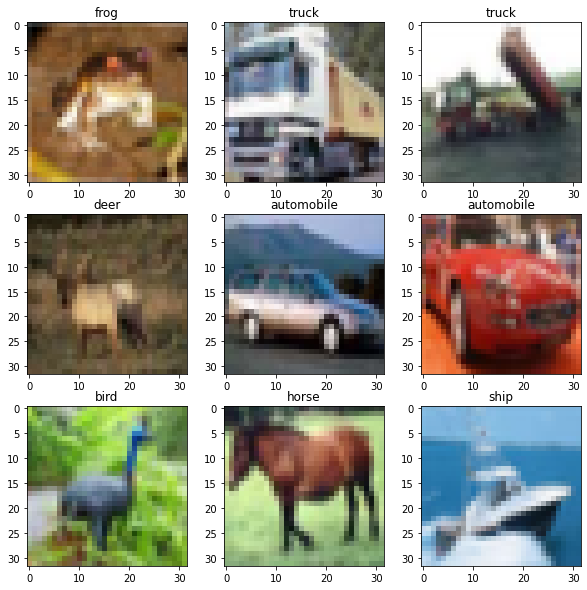

In [4]:
figure = plt.gcf()
figure.set_size_inches((10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    axis = plt.gca()
    axis.set_title(class_names[training_dataset_y[i]])
    plt.imshow(training_dataset_x[i], )
    
training_dataset_x = training_dataset_x / 255 

In [7]:
from tensorflow.keras.utils import to_categorical


In [8]:
training_dataset_y = to_categorical(training_dataset_y)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
model = Sequential(name = 'CIFAR-10' )
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3), name='Convolution-1')) #convolution katmanlarını olusturdum
model.add(MaxPooling2D(name='Pooling-1'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', name='Convolution-2')) 
model.add(MaxPooling2D(name='Pooling-2'))
model.add(Flatten(name='Flatten'))
model.add(Dense(128, activation='relu', name='Dense-1'))
model.add(Dense(128, activation='relu', name='Dense-2'))
model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

model.compile(optimizer= 'rmsprop' , loss= 'categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, epochs=5, batch_size=64, validation_split=0.2)

Model: "CIFAR-10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution-1 (Conv2D)       (None, 32, 32, 32)        896       
_________________________________________________________________
Pooling-1 (MaxPooling2D)     (None, 16, 16, 32)        0         
_________________________________________________________________
Convolution-2 (Conv2D)       (None, 16, 16, 64)        18496     
_________________________________________________________________
Pooling-2 (MaxPooling2D)     (None, 8, 8, 64)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
Dense-1 (Dense)              (None, 128)               524416    
_________________________________________________________________
Dense-2 (Dense)              (None, 128)               165

In [11]:
import matplotlib.pyplot as plt


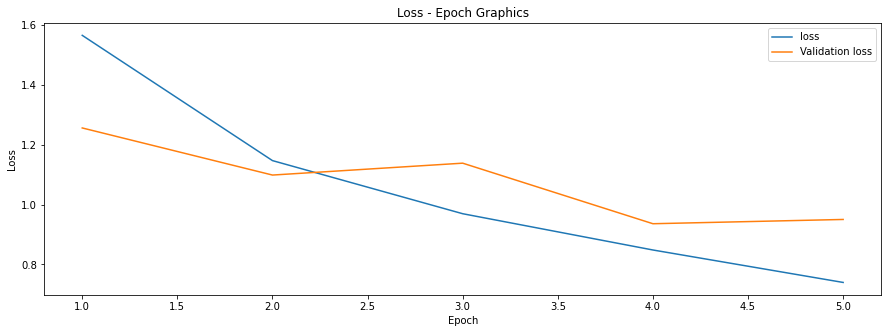

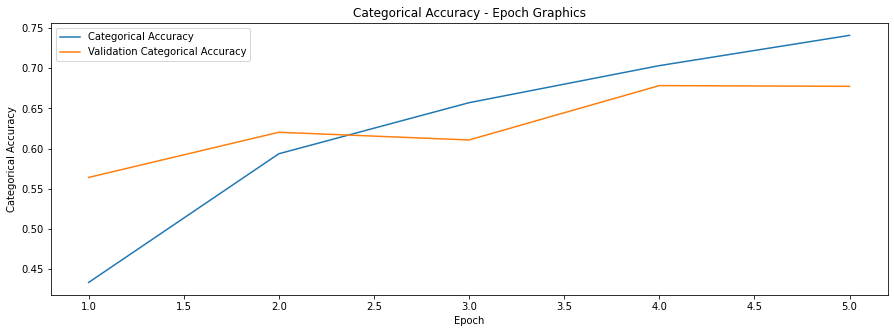

In [12]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['loss', 'Validation loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Categorical Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.plot(range(1, len(hist.history['categorical_accuracy']) + 1), hist.history['categorical_accuracy'])
plt.plot(range(1, len(hist.history['val_categorical_accuracy']) + 1), hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

In [6]:
import numpy as np
import glob


In [7]:
for path in glob.glob('test-images/*.jpg'):#predictionın doğruluğunu test ediyorum
        img_data = plt.imread(path)
        scaled_img_data = img_data / 255 #min max scaling yaptım
        result = model.predict(scaled_img_data.reshape(1, 32, 32, 3))#predicte soktum iki boyutlu istiyor dataları o yuzden reshape yaptım bir satır olucak sekilde
        number = np.argmax(result)#sinir ağı çıktısının en büyük elemanının indeksini buldum
        plt.title(class_names[number])#bu indeksi class names e koydum bu sayede tahmin edilen seyin ne olduğunu soyleyecek
        plt.imshow(img_data)
        plt.show()

NameError: name 'plt' is not defined